In [ ]:
# https://en.wikipedia.org/wiki/MNIST_database#/media/File:MnistExamples.png

%tensorflow_version 2.x
%load_ext tensorboard

import os, datetime
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import TensorBoard

logdir = os.path.join("logs", datetime.datetime.now().strftime("%Y%m%d-%H%M%S"))

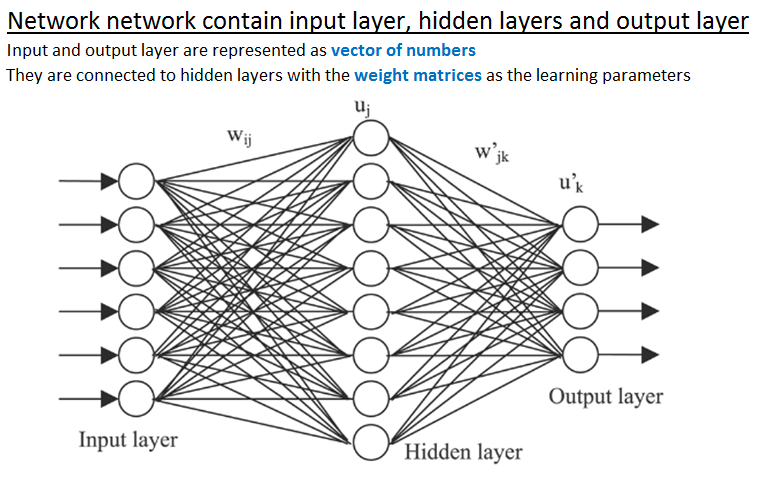

In [ ]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

In [ ]:
# Visual the data

index = 1

print(x_train[index])
first_image = x_train[index]
plt.imshow(first_image)
plt.show()

print("Label : ", y_train[index])

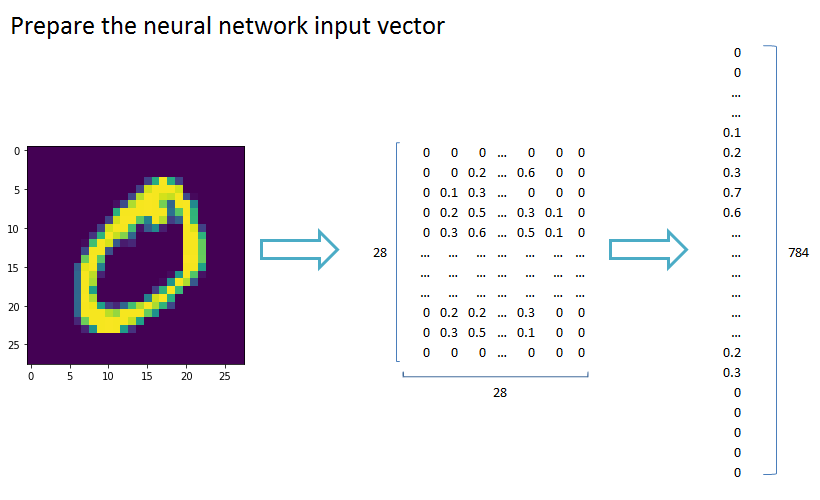

In [ ]:
# reshape the 28x28 pixels to a 784 array (for dense neural network)
# and normalize the number by 255

x_trainp = x_train.reshape(60000, 784)
x_testp = x_test.reshape(10000, 784)

x_trainp = x_trainp.astype('float32')
x_testp = x_testp.astype('float32')
x_trainp /= 255
x_testp /= 255
print(x_trainp.shape[0], 'train samples')
print(x_testp.shape[0], 'test samples')

In [ ]:
# One example of the train data after reshaped and normalized
print(x_trainp[0])

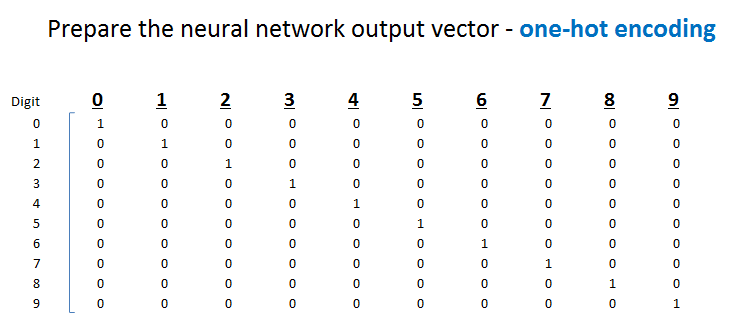

In [ ]:
# convert class vectors to binary class matrices: one-hot encoding
num_classes = 10

y_trainp = keras.utils.to_categorical(y_train, num_classes)
y_testp = keras.utils.to_categorical(y_test, num_classes)

print("one-hot encoding")
print("Label 0 is ", y_trainp[1])
print("Label 5 is ", y_trainp[0])

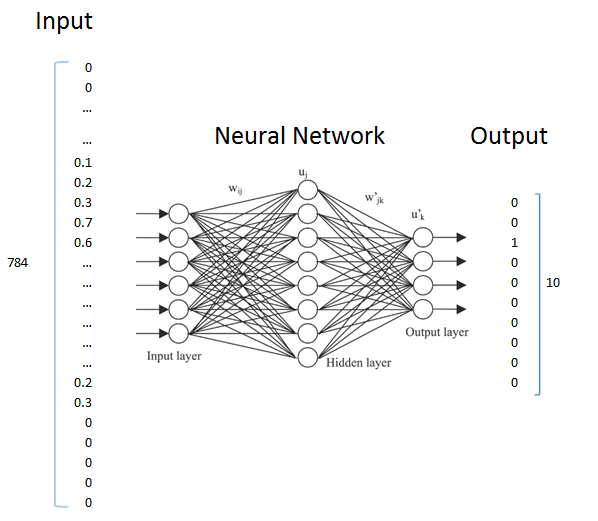

In [ ]:
model = Sequential()

model.add(Dense(2, activation='relu', input_shape=(784,)))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(),
              metrics=['accuracy'])

plot_model(model, show_shapes=True, show_layer_names=True)


In [ ]:
model.summary()
# Param calculation in each layer = input * output + output bias
# dense Params = 784 * 2 + 2 = 1570
# dense_1 params = 2 * 10 + 10 = 30
# "?" is the number of samples

In [ ]:
batch_size = 128
epochs = 10

# Set aside the first 10,000 samples as the validation set 
x_valp = x_trainp[:10000]
partial_x_trainp = x_trainp[10000:]

y_valp = y_trainp[:10000]
partial_y_trainp = y_trainp[10000:]

tensorboard_callback = TensorBoard(logdir, histogram_freq=1)
history = model.fit(partial_x_trainp, partial_y_trainp,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(x_valp, y_valp),
                    callbacks=[tensorboard_callback])

# Plot the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

In [ ]:
# Do the prediction on test set
score = model.evaluate(x_testp, y_testp, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

ans = model.predict(x_testp)

In [ ]:
# Predict individual number
p_index = 1

first_image = x_test[p_index]
plt.imshow(first_image)
plt.show()

count = 0
for a in ans[p_index]:
    print(count, "=", a*100)
    count = count + 1

In [ ]:
%tensorboard --logdir logs

# Visualize Neural Network

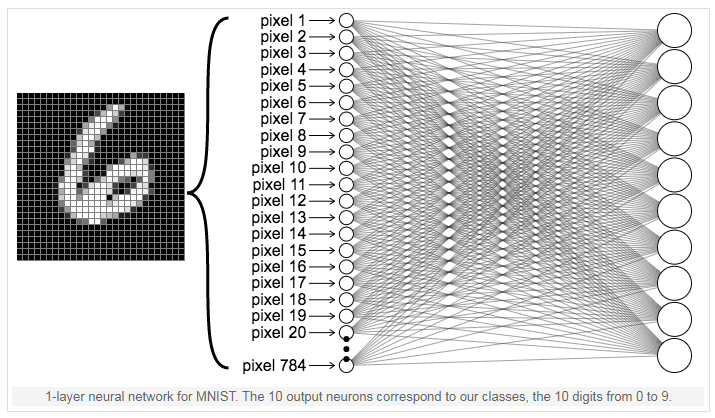

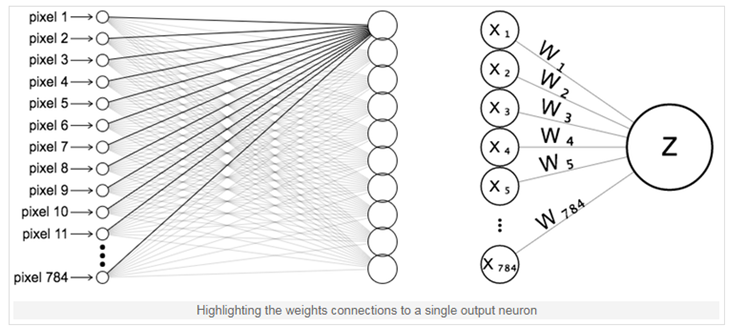

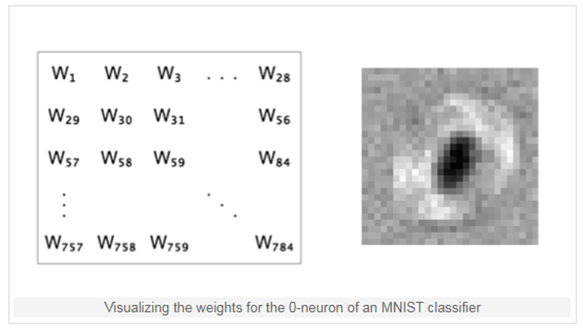